In [50]:
import sys  
sys.path.insert(0, './../')
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import bbdc2021 as bbdc

# Labels

In [19]:
labels = pd.read_csv('../data/final_pre_dataset/dev-labels.csv')
labels['duration'] = labels.offset - labels.onset

In [20]:
labels

,filename,onset,offset,event_label,duration
0,00001_mix.wav,2.852143,3.852143,Cheering,1.0
1,00001_mix.wav,5.468056,6.468056,Church_bell,1.0
2,00002_mix.wav,0.433088,1.433088,Doorbell,1.0
3,00002_mix.wav,2.510292,3.510292,Shatter,1.0
4,00002_mix.wav,5.106170,6.106170,Church_bell,1.0
...,...,...,...,...,...
30039,09999_mix.wav,7.528819,9.528819,Doorbell,2.0
30040,10000_mix.wav,0.337247,1.337247,Shout,1.0
30041,10000_mix.wav,2.881387,4.881387,Shatter,2.0
30042,10000_mix.wav,5.006086,7.006086,Burping_and_eructation,2.0


event_label
Bark                                  [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Burping_and_eructation                [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Camera                                [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Cheering                              [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Church_bell                           [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Cough                                 [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Doorbell                              [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Fireworks                             [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Meow                                  [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Scratching_(performance_technique)    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Shatter                               [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Shout                                 [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

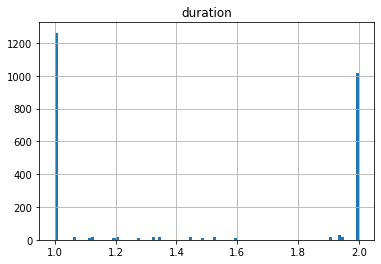

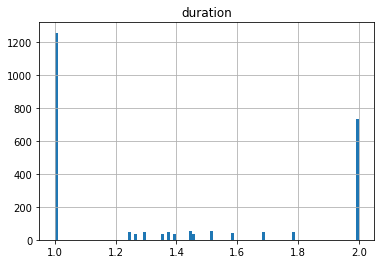

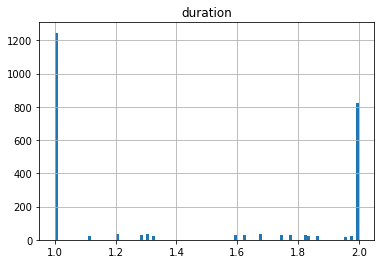

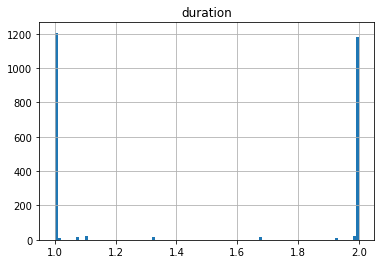

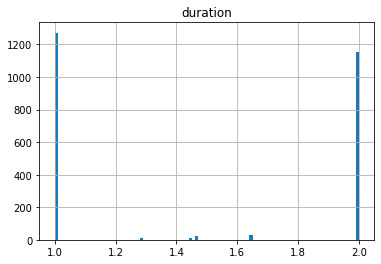

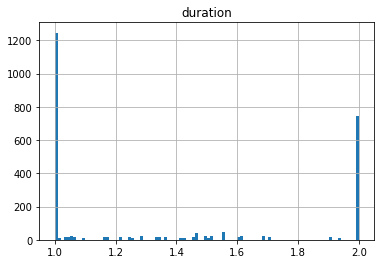

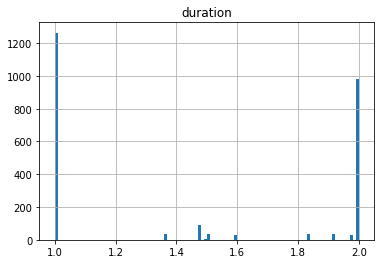

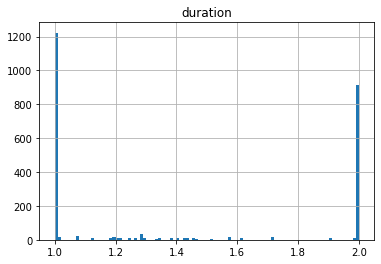

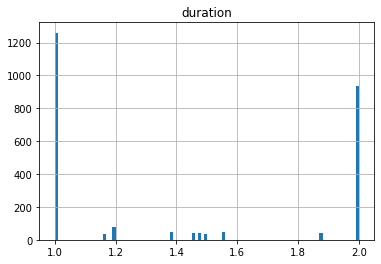

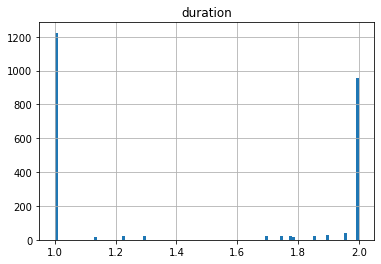

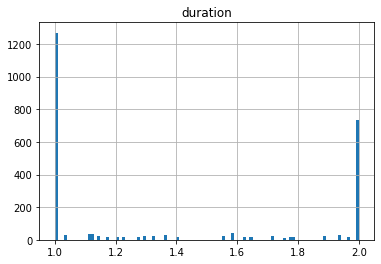

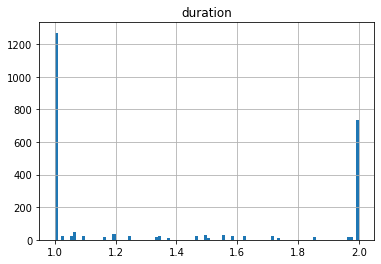

In [21]:
labels.groupby('event_label').hist(column='duration', bins=100)

In [83]:
# calculate how often an event appears on average
current_file = '00001_mix.wav'
counts = [0]
for file in labels['filename']:
    if file != current_file:
        counts.append(0)
        current_file = file
    counts[-1] += 1

(array([3296.,    0.,    0.,    0.,    0., 3364.,    0.,    0.,    0.,
        3340.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

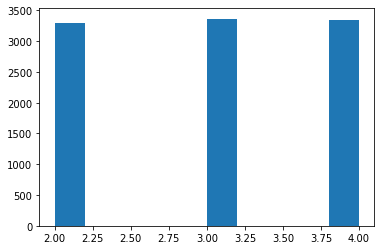

In [84]:
plt.hist(counts)

# FFT Daten

In [26]:
pathToDataset = "dataset_fft_l1024_o256_b32/"
X, Y, timepoints, fileList = bbdc.load_data("dev-labels.csv", pathToDataset)

## Allgemein

In [38]:
X[0].shape

(209, 17)

In [39]:
Y[0].shape

(209, 13)

In [41]:
len(X)

10000

In [47]:
X[0:3]

[array([[0.00000000e+00, 5.50670334e+01, 5.12426246e+01, ...,
         6.36328349e+01, 5.97598439e+01, 7.05811096e+01],
        [4.80000000e-02, 5.81207638e+01, 5.20799205e+01, ...,
         6.00871174e+01, 5.96410296e+01, 7.55823645e+01],
        [9.60000000e-02, 5.94011127e+01, 5.60196019e+01, ...,
         5.76881049e+01, 6.00752303e+01, 7.77838670e+01],
        ...,
        [9.88800000e+00, 5.81476666e+01, 6.23736696e+01, ...,
         5.95277512e+01, 6.06810341e+01, 7.97839429e+01],
        [9.93600000e+00, 5.31135973e+01, 5.07801156e+01, ...,
         5.91714525e+01, 5.91354797e+01, 7.46124868e+01],
        [9.98400000e+00, 5.29562331e+01, 5.16855715e+01, ...,
         5.69170246e+01, 5.79354065e+01, 6.95984093e+01]]),
 array([[0.00000000e+00, 4.15612020e+01, 4.90769022e+01, ...,
         6.06818020e+01, 6.13358443e+01, 6.67118330e+01],
        [4.80000000e-02, 3.94700349e+01, 4.54574778e+01, ...,
         5.96133058e+01, 5.91389145e+01, 7.02966374e+01],
        [9.60000000e-02, 

In [48]:
Y[0:3]

[array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])]

In [60]:
fileList.head()

,filename,onset,offset,event_label
0,00001_mix.wav,2.852143,3.852143,4
1,00001_mix.wav,5.468056,6.468056,5
2,00002_mix.wav,0.433088,1.433088,7
3,00002_mix.wav,2.510292,3.510292,11
4,00002_mix.wav,5.106170,6.106170,5


## Einzelne Instances

In [74]:
def plot_instance(filenumber):
    """Display all features of an instance in a plot and also print info where events are.
    filenumbers starting with 1."""
    plt.plot(timepoints, X[filenumber - 1])
    filename = str(filenumber).zfill(5) + '_mix.wav'
    print(labels.loc[labels['filename'] == filename])
    plt.show()

        filename     onset    offset  event_label  duration
0  00001_mix.wav  2.852143  3.852143     Cheering       1.0
1  00001_mix.wav  5.468056  6.468056  Church_bell       1.0


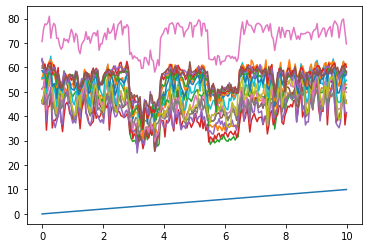

In [75]:
plot_instance(1)

        filename     onset    offset  event_label  duration
2  00002_mix.wav  0.433088  1.433088     Doorbell       1.0
3  00002_mix.wav  2.510292  3.510292      Shatter       1.0
4  00002_mix.wav  5.106170  6.106170  Church_bell       1.0
5  00002_mix.wav  7.652121  9.652121       Camera       2.0


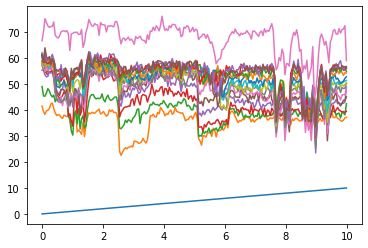

In [76]:
plot_instance(2)

        filename     onset    offset event_label  duration
6  00003_mix.wav  0.145615  1.145615   Fireworks       1.0
7  00003_mix.wav  2.646072  4.646072       Cough       2.0
8  00003_mix.wav  5.392588  6.392588   Fireworks       1.0
9  00003_mix.wav  7.796207  8.796207        Meow       1.0


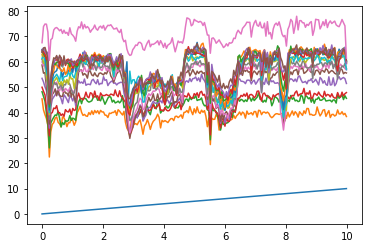

In [77]:
plot_instance(3)

            filename     onset    offset event_label  duration
14962  05000_mix.wav  0.729737  2.195237       Shout    1.4655
14963  05000_mix.wav  4.474616  5.474616    Cheering    1.0000
14964  05000_mix.wav  7.502460  9.502460        Bark    2.0000


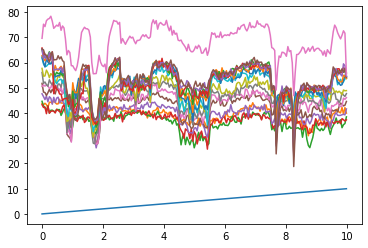

In [79]:
plot_instance(5000)

## Correlation between channels

In [117]:
def corr_coef(filenumber):
    """Calculates all linear correlation coefficients."""
    plt.imshow(np.corrcoef(X[filenumber - 1], rowvar=False))
    filename = str(filenumber).zfill(5) + '_mix.wav'
    print(labels.loc[labels['filename'] == filename])
    plt.colorbar()
    plt.show()

        filename     onset    offset  event_label  duration
0  00001_mix.wav  2.852143  3.852143     Cheering       1.0
1  00001_mix.wav  5.468056  6.468056  Church_bell       1.0


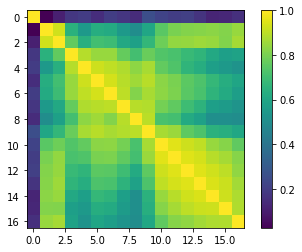

In [118]:
corr_coef(1)

        filename     onset    offset  event_label  duration
2  00002_mix.wav  0.433088  1.433088     Doorbell       1.0
3  00002_mix.wav  2.510292  3.510292      Shatter       1.0
4  00002_mix.wav  5.106170  6.106170  Church_bell       1.0
5  00002_mix.wav  7.652121  9.652121       Camera       2.0


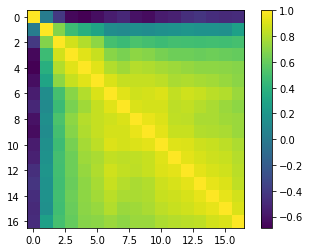

In [119]:
corr_coef(2)

        filename     onset    offset event_label  duration
6  00003_mix.wav  0.145615  1.145615   Fireworks       1.0
7  00003_mix.wav  2.646072  4.646072       Cough       2.0
8  00003_mix.wav  5.392588  6.392588   Fireworks       1.0
9  00003_mix.wav  7.796207  8.796207        Meow       1.0


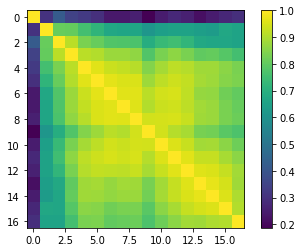

In [120]:
corr_coef(3)

         filename     onset    offset event_label  duration
10  00004_mix.wav  0.227365  1.227365        Meow       1.0
11  00004_mix.wav  4.620843  5.620843    Cheering       1.0
12  00004_mix.wav  6.796896  8.796896        Bark       2.0


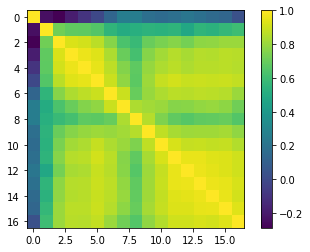

In [121]:
corr_coef(4)

         filename     onset    offset                         event_label  \
13  00005_mix.wav  0.162718  1.162718  Scratching_(performance_technique)   
14  00005_mix.wav  3.379185  5.345872                             Shatter   
15  00005_mix.wav  7.550030  8.550030                            Doorbell   

    duration  
13  1.000000  
14  1.966687  
15  1.000000  


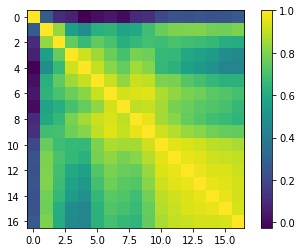

In [122]:
corr_coef(5)

         filename     onset    offset             event_label  duration
16  00006_mix.wav  0.693424  1.986424  Burping_and_eructation  1.293000
17  00006_mix.wav  3.579806  4.945618                   Cough  1.365812
18  00006_mix.wav  7.919332  8.919332             Church_bell  1.000000


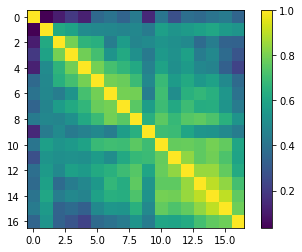

In [123]:
corr_coef(6)

         filename     onset    offset             event_label  duration
16  00006_mix.wav  0.693424  1.986424  Burping_and_eructation  1.293000
17  00006_mix.wav  3.579806  4.945618                   Cough  1.365812
18  00006_mix.wav  7.919332  8.919332             Church_bell  1.000000


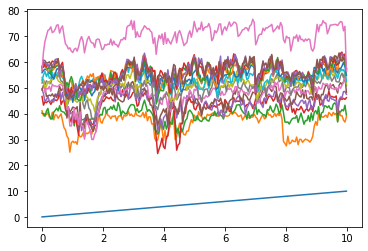

In [124]:
plot_instance(6)

         filename     onset    offset event_label  duration
19  00007_mix.wav  2.765623  3.765623      Camera       1.0
20  00007_mix.wav  5.135682  7.135682       Shout       2.0


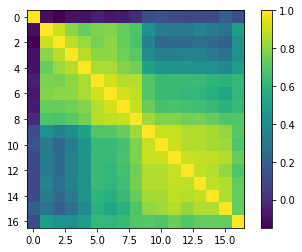

In [125]:
corr_coef(7)

         filename     onset    offset  event_label  duration
21  00008_mix.wav  0.135675  1.135675  Church_bell       1.0
22  00008_mix.wav  2.640467  4.640467  Church_bell       2.0
23  00008_mix.wav  5.401098  6.401098         Bark       1.0
24  00008_mix.wav  7.886122  8.886122  Church_bell       1.0


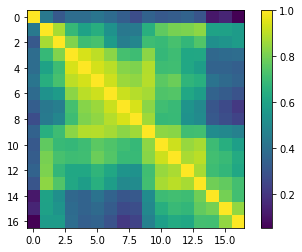

In [126]:
corr_coef(8)

            filename     onset    offset event_label  duration
14962  05000_mix.wav  0.729737  2.195237       Shout    1.4655
14963  05000_mix.wav  4.474616  5.474616    Cheering    1.0000
14964  05000_mix.wav  7.502460  9.502460        Bark    2.0000


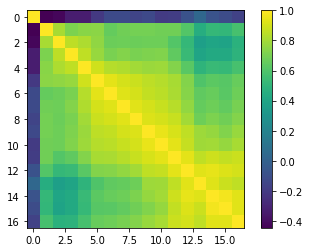

In [127]:
corr_coef(5000)